In [1]:
from keras.models import *
from keras.layers import *
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
from sklearn.metrics import *
import keras.activations

Using TensorFlow backend.


In [2]:
epsilon=0.00000001

In [3]:
root="../input/data/data/"
print(os.listdir(root))

['x_train6.npy', 'x_train3.npy', 's_train1.npy', 's_train4.npy', 's_train2.npy', 'x_train1.npy', 'x_train4.npy', 'x_train2.npy', 's_train6.npy', 'x_train5.npy', 's_train3.npy', 's_train5.npy']


In [4]:
x=[]
s=[]
for i in range(1,7):
    x_tmp=np.load(root+'x_train'+str(i)+'.npy')
    s_tmp=np.load(root+'s_train'+str(i)+'.npy')
    x.append(x_tmp)
    s.append(s_tmp)

In [5]:
len(x[5])

3240

In [6]:
for i in range(1,6):
    x[0]=np.concatenate((x[0],x[i]))
print(x[0].shape)

(16434, 180, 180)


In [7]:
for i in range(1, 6):
    s[0]= np.concatenate((s[0], s[i]))
print(s[0].shape)

(16434,)


In [8]:
x_train,x_val,s_train,s_val=train_test_split(x[0],s[0],test_size=0.3,random_state=42)

In [9]:
mean=np.mean(x_train,axis=0)
std=np.std(x_train,axis=0)
x_train=(x_train-mean)/(std+epsilon)
x_val=(x_val-mean)/(std+epsilon)

x_train=np.expand_dims(x_train,axis=3)
x_val=np.expand_dims(x_val,axis=3)
s_train=np.expand_dims(s_train,axis=1)
s_val=np.expand_dims(s_val,axis=1)
print(x_train.shape)
print(x_val.shape)
print(s_train.shape)
print(s_val.shape)

(11503, 180, 180, 1)
(4931, 180, 180, 1)
(11503, 1)
(4931, 1)


In [10]:
def CNN_model(input_shape):
    x_in=Input(input_shape)
    out=Conv2D(4,(9,9),strides=(2,2))(x_in)
    out=MaxPool2D(strides=(1,1))(out)
    out=Activation('relu')(out)
    out=Conv2D(16,(7,7),strides=(2,2))(out)
    out= MaxPool2D(strides=(1, 1))(out) #39, 39, 16
    out= Activation('relu')(out) 
    out= Conv2D(32, (5, 5), strides= (2, 2))(out) #18,18 32
    out= MaxPool2D(strides=(1, 1))(out) #17, 17, 32
    out= Activation('relu')(out) 
    out= Conv2D(64, (5, 5), activation='relu', strides=(2, 2))(out) #7, 7, 64
    out=Flatten()(out)
    out=Dense(2048,activation='relu')(out)
    out=Dense(1024,activation='relu')(out)
    out= Dense(512, activation='relu')(out)
    out= Dense(64, activation='relu')(out)
    out= Dense(10, activation='relu')(out)
    out= Dense(1, activation='sigmoid')(out)
    
    return Model(inputs=x_in,outputs=out)

In [11]:
model=CNN_model((180,180,1))
model.compile(optimizer='Nadam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x=x_train,y=s_train,batch_size=512,epochs=15,verbose=True,validation_data=(x_val,s_val))
model.save('saved_model.h5')

Train on 11503 samples, validate on 4931 samples
Epoch 1/15
11503/11503 [==============================] - 14s 1ms/step - loss: 0.6760 - acc: 0.7921 - val_loss: 0.4779 - val_acc: 0.8118
Epoch 2/15
11503/11503 [==============================] - 10s 845us/step - loss: 0.4504 - acc: 0.8129 - val_loss: 0.4516 - val_acc: 0.8118
Epoch 3/15
11503/11503 [==============================] - 10s 875us/step - loss: 0.4635 - acc: 0.8129 - val_loss: 0.4138 - val_acc: 0.8118
Epoch 4/15
11503/11503 [==============================] - 10s 852us/step - loss: 0.3862 - acc: 0.8130 - val_loss: 0.3700 - val_acc: 0.8128
Epoch 5/15
11503/11503 [==============================] - 10s 843us/step - loss: 0.3714 - acc: 0.8164 - val_loss: 0.3519 - val_acc: 0.8144
Epoch 6/15
11503/11503 [==============================] - 10s 841us/step - loss: 0.3447 - acc: 0.8378 - val_loss: 0.3376 - val_acc: 0.8380
Epoch 7/15
11503/11503 [==============================] - 10s 843us/step - loss: 0.3131 - acc: 0.8527 - val_loss: 0.301

In [13]:
predictions =model.predict(x_val)

In [14]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_curve

In [15]:
predictions= predictions>=0.5

In [16]:
accuracy_score = accuracy_score(s_val, predictions)
recall_score= recall_score(s_val, predictions)
f1_score=f1_score(s_val, predictions)
print(accuracy_score)
print(recall_score)
print(f1_score)

0.94788075441087
0.985261054209343
0.9684468999386127


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 86, 86, 4)         328       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 4)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 85, 85, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 16)        3152      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 39, 39, 16)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 39, 39, 16)        0         
__________

In [93]:
from PIL import Image
import matplotlib.pyplot as plt

In [139]:
list_layerweights=[layer.get_weights() for layer in model.layers[:]]
list_layernames=[layer.name for layer in model.layers[:]]
print(list_layernames)

['input_1', 'conv2d_1', 'max_pooling2d_1', 'activation_1', 'conv2d_2', 'max_pooling2d_2', 'activation_2', 'conv2d_3', 'max_pooling2d_3', 'activation_3', 'conv2d_4', 'flatten_1', 'dense_1', 'dense_2', 'dense_3', 'dense_4', 'dense_5', 'dense_6']


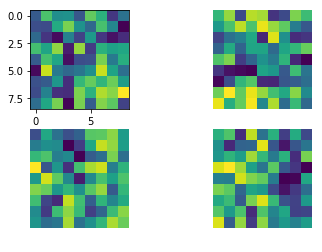

In [151]:
# Colormaps for layer1
# Layer has 16 filters

layer_weight=list_layerweights[1][0]  # size is 2. One for filter and other for bais. we take filter only
plt.figure()
for i in range(0,4):
    plt.subplot(2,2,i+1)
    t=layer_weight[:,:,:,i]
    plt.imshow(t[:,:,0])
    if(i>0):
        plt.axis('off')

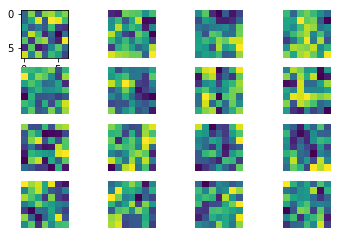

In [152]:
# Colormaps for layer 4
# Layer has 16 filters

layer_weight=list_layerweights[4][0]  
plt.figure()

for i in range(0,16):
    plt.subplot(4,4,i+1)
    t=layer_weight[:,:,:,i]
    plt.imshow(t[:,:,0])
    if(i>0):
        plt.axis('off')

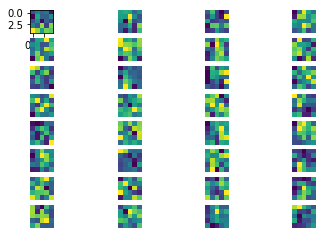

In [153]:
# Colormaps for layer 7
# Layer has 32 filters

layer_weight=list_layerweights[7][0]  
plt.figure()

for i in range(0,32):
    plt.subplot(8,4,i+1)
    t=layer_weight[:,:,:,i]
    plt.imshow(t[:,:,0])
    if(i>0):
        plt.axis('off')